# Travel Insurance Prediction 

## Introduction

In this project, we aim to predict whether given customers will be interested in buying travel insurance, using the features provided. We assume that there are exceptions, as predictions made does not play a role of representative to all the customers. However, we can confidently make an argument based on the data, due to the tendencies or patterns we will be noticing throughout this project.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection

print("package loaded")

package loaded


## Import Dataset

In [2]:
data = pd.read_csv("data/TravelInsurancePrediction.csv").iloc[:,1:]
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
data.tail()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


## Data Exploration

### Feature names and types

* `Age`: Age of the customer
* `Employment Type`: The sectore in which the customer is employed
* `GraduateOrNot`: Whether the customer is gradted from college or not
* `AnnualIncome`: Annual income of the customer
* `FamilyMembers`: Number of family member living with the customer
* `ChronicDiseases`: Whether customer has chronic diseases
* `FrequentFlyer`: Whether customer books frequent flight tickets
* `EverTravelledAbroad`: Whether customer travelled to a different country before
* `TravelInsurance`: Whether customer has travel insurance

In [4]:
data.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

We see that some of the features have a type of `object`, thus, let us quantify these to numerical classes. First determine if any of the features have missing values, then proceed to replacing the values.

### Missing Values

In [5]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

We have no missing values. Now, let us replace the values for `Employment Type`, `GraduateOrNot`, `FrequentFlyer`, `EverytravelledAbroad`.

In [6]:
# quantifying Employment Type feature
employment_dict = {"Government Sector": 1, "Private Sector/Self Employed": 2}

for employment_type in list(employment_dict.keys()):
    data["Employment Type"].replace(employment_type, employment_dict[employment_type], inplace=True)

# quantifying GraduateOrNot feature
graduate_dict = {"Yes": 1, "No": 0}

for grad in list(graduate_dict.keys()):
    data["GraduateOrNot"].replace(grad, graduate_dict[grad], inplace=True)

# quantifying FrequentFlyer feature
flyer_dict = {"Yes": 1, "No": 0}

for flyer in list(flyer_dict.keys()):
    data["FrequentFlyer"].replace(flyer, flyer_dict[flyer], inplace=True)
    
# quantifying EverTravelledAborad feature
abroad_dict = {"Yes": 1, "No": 0}

for abroad in list(abroad_dict.keys()):
    data["EverTravelledAbroad"].replace(abroad, abroad_dict[abroad], inplace=True)
    
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,2,1,1250000,7,0,0,0,0
2,34,2,1,500000,4,1,0,0,1
3,28,2,1,700000,3,1,0,0,0
4,28,2,1,700000,8,1,1,0,0


### Data Dimensions, Description

In [7]:
data.shape

(1987, 9)

In [8]:
data.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,1.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,1.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,2.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,2.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


### Outliers

We will examine if there are any outliers in each features.

<Axes: xlabel='EverTravelledAbroad'>

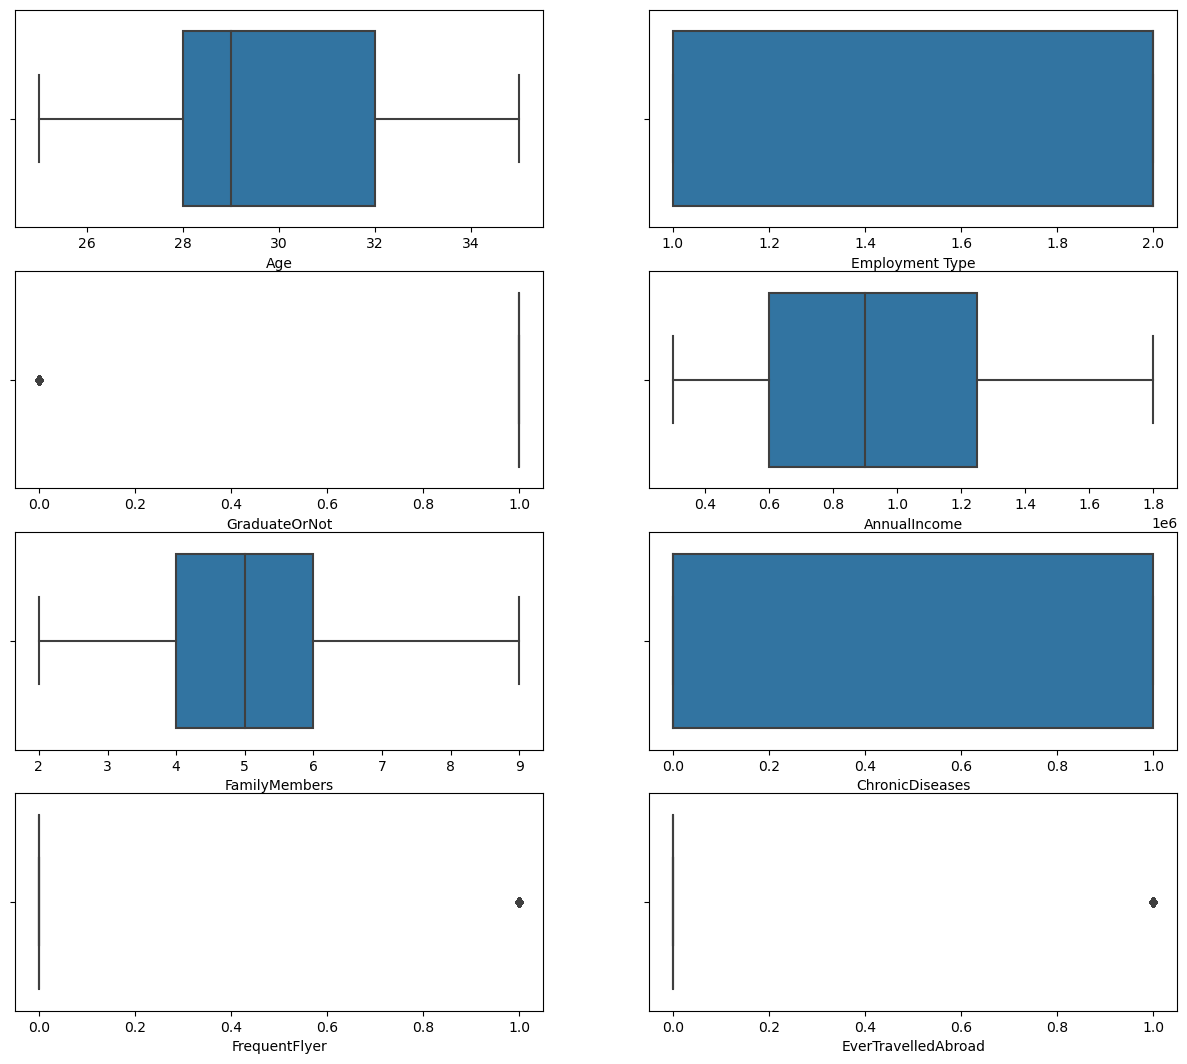

In [9]:
fig, ax = plt.subplots(4,2, figsize = (15,13))
sns.boxplot(x = data["Age"],ax = ax[0,0])
sns.boxplot(x = data["Employment Type"],ax = ax[0,1])
sns.boxplot(x = data["GraduateOrNot"],ax = ax[1,0])
sns.boxplot(x = data["AnnualIncome"],ax = ax[1,1])
sns.boxplot(x = data["FamilyMembers"],ax = ax[2,0])
sns.boxplot(x = data["ChronicDiseases"],ax = ax[2,1])
sns.boxplot(x = data["FrequentFlyer"],ax = ax[3,0])
sns.boxplot(x = data["EverTravelledAbroad"],ax = ax[3,1])


## Exploratory Data Analysis 

### Univariate Analysis

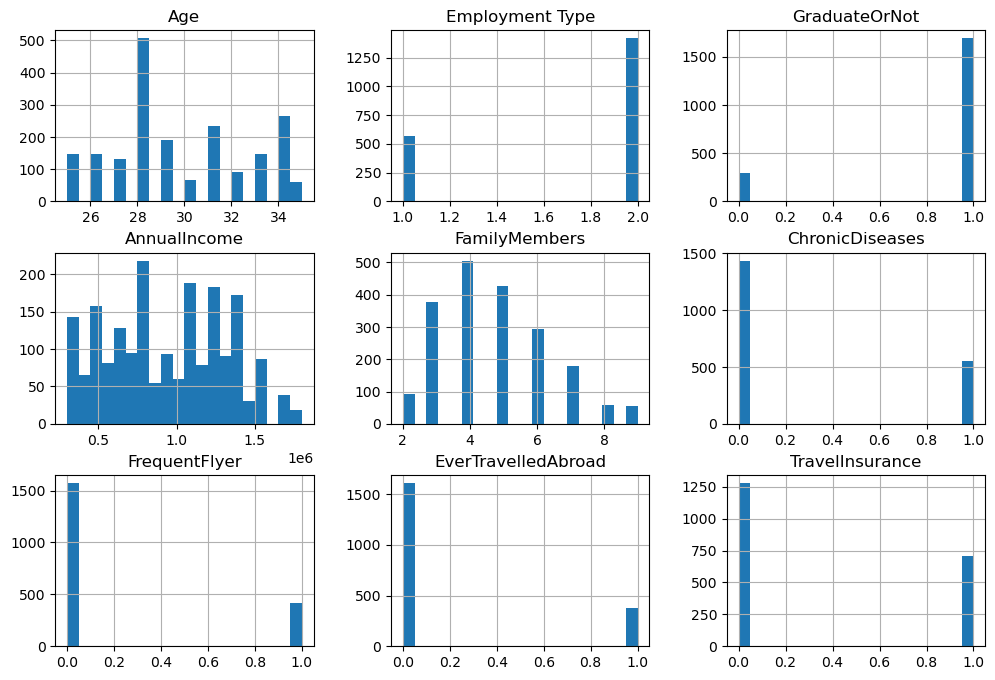

In [10]:
data.hist(figsize=(12,8),bins=20)
plt.show()

Text(0.5, 0, 'Travel Insurance')

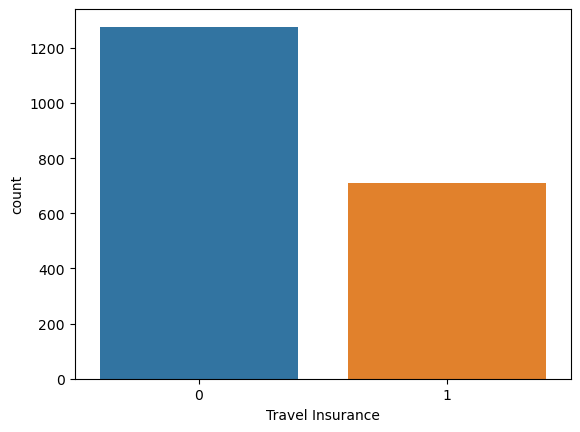

In [11]:
# number of people who have insurance or not

sns.countplot(x = "TravelInsurance", data = data)
plt.xlabel("Travel Insurance")

In [12]:
# as proportions
print("As proportions:")
data["TravelInsurance"].value_counts(normalize=True)

As proportions:


TravelInsurance
0    0.642677
1    0.357323
Name: proportion, dtype: float64

In [13]:
data.groupby(["TravelInsurance"]).mean()[["AnnualIncome"]]

,AnnualIncome
TravelInsurance,
0,8.212999e+05
1,1.133239e+06


In [14]:
# more analysis on annual income
data_annualincome = data[["AnnualIncome", "TravelInsurance"]]

# average annualincome
annualincome_average = data_annualincome["AnnualIncome"].mean()

# number of people on travel insurance status whether, depending on their wage
count_annualincome_higher = data_annualincome[data_annualincome["AnnualIncome"] > annualincome_average].groupby(["TravelInsurance"]).count()
count_annualincome_lower = data_annualincome[data_annualincome["AnnualIncome"] < annualincome_average].groupby(["TravelInsurance"]).count()

# merging to dataframes
count_annualincome = pd.concat([count_annualincome_higher, count_annualincome_lower], axis=1)
count_annualincome.set_axis(["Higher than average", "Lower than average"], axis="columns")

,Higher than average,Lower than average
TravelInsurance,,
0,488,789
1,484,226


In [15]:
print(f"The percentage of people who have higher than average salary with no travel insurance is {488/(488+484)}")

The percentage of people who have higher than average salary with no travel insurance is 0.5020576131687243


In [16]:
print(f"The percentage of people who have lower than average salary with no travel insurance is {789/(789+226)}")

The percentage of people who have lower than average salary with no travel insurance is 0.7773399014778325


### Observation

* We can see that whether they have travel insurance or not, people with age of 28 is the most frequent age group. This indicates that most people are going on a trip when they are 28. 
* We can also see that the people who are going on a trip, are most likely to be graduated.
* The number of people going on a trip with their family member seems to be highest when they have 4 members in their family. This seems like this is due to a normal distribution phenomenon. 
* Also, the proportions of people who have travel insurance is 64.3% and the proportion of people who do not have travel insurance is 35.7%. This shows that people do not tend to buy travel insurance.
* It seems that the annual income of people who have travel insurance are, on average, is higher than the annual income of people who do not have one.
* As one can easily suppose, the percentage of people with higher-than-average salary not having a travel insurance is lower than the ones with lower-than-average salary. This can be explained as they are able to afford more expensive services.

### Bivariate Analysis

/Users/yushinnam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


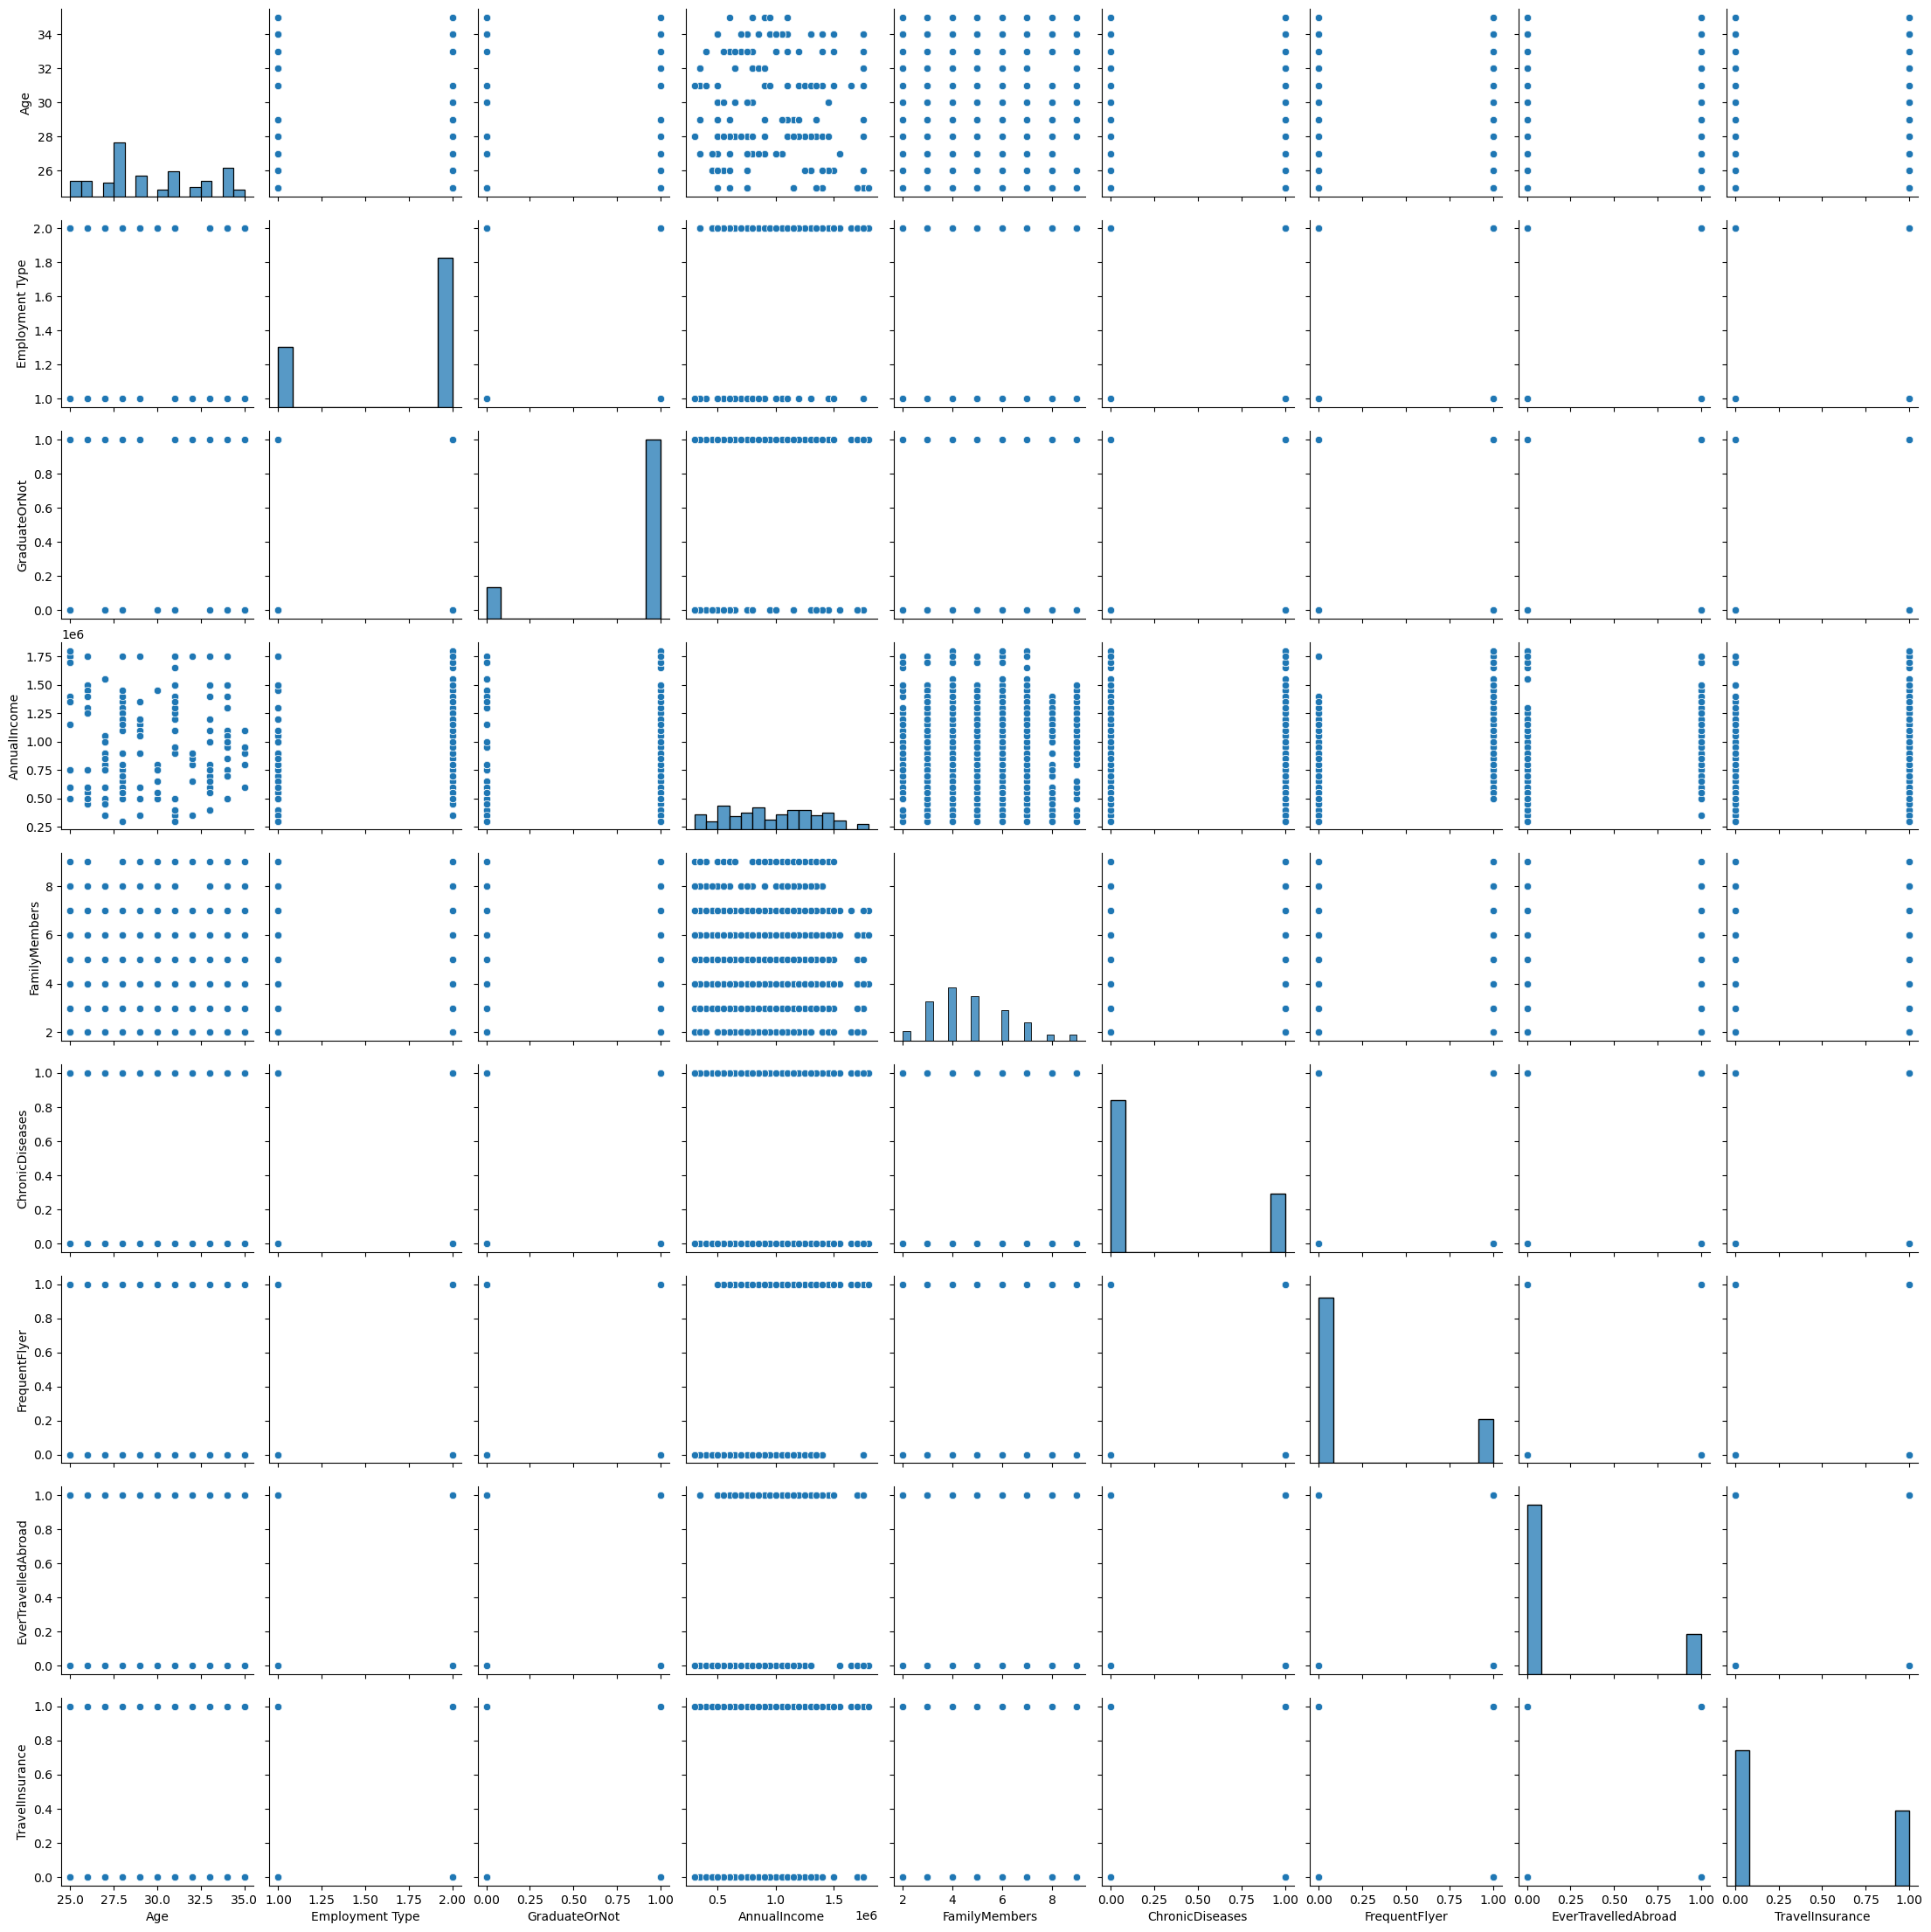

In [17]:
sns.pairplot(data=data)

In [18]:
data.groupby(["TravelInsurance"]).mean()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
TravelInsurance,,,,,,,,
0,29.517619,1.663273,0.846515,8.212999e+05,4.657009,0.271731,0.139389,0.064213
1,29.888732,1.802817,0.860563,1.133239e+06,4.925352,0.288732,0.336620,0.419718


### Correlation

<Axes: >

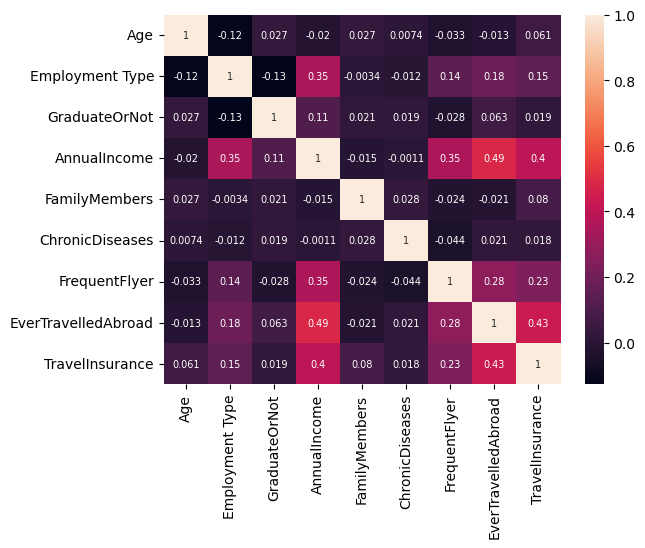

In [19]:
# create heat map of all variables
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":7})

### Observation

 Since more of the features are categorical, we wouldn't expect much correlation between them. The correation heatmap above shows the correlations between every features and we can notice there is the highest positive correlation of 0.49 with `EverTravelledAbroad` and `AnnualIncome`, followed by 0.43 positive correlation with `EverTravelledAbroad` and `TravelInsurance`. What we can conjecture from the observation, is that since there is a relative high positive correlation between `AnnualIncome` and `EverTravelledAbroad`, people who are comparatively well-off will go on a trip multiple times. Again, `EverTravelledAbroad` is a categorical feature, therefore, it shows be less of correlation. Additionally, `EverTravelledAbroad` and `TravelInsurance` also shows a positive correlation. This kind of behaviour is displayed because it seems like travellers tends to get travel insurance even if they are experienced with trips. This is a bit surprising because some may hypothesize that people with no experience in travelling get insurances, due to how uninformed they are. 

Let us further examine the relationship between the following features: `EverTravelledAbroad`, `AnnualIncome`, `TravelInsurance`.

In [49]:
# high salary people, separated by whether they have gone travelling or not
high_salary_travelled_before = data.loc[(data["AnnualIncome"] > annualincome_average) & (data["EverTravelledAbroad"] == 1), :].groupby(["TravelInsurance"])[["AnnualIncome"]].count()
high_salary_not_travelled_before = data.loc[(data["AnnualIncome"] > annualincome_average) & (data["EverTravelledAbroad"] == 0), :].groupby(["TravelInsurance"])[["AnnualIncome"]].count()

high_salary_travel_abroad_agg = pd.concat([high_salary_travelled_before, high_salary_not_travelled_before], axis=1)

# low salary people, separated by whether they have gone travelling or not
low_salary_travelled_before = data.loc[(data["AnnualIncome"] < annualincome_average) & (data["EverTravelledAbroad"] == 1), :].groupby(["TravelInsurance"])[["AnnualIncome"]].count()
low_salary_not_travelled_before = data.loc[(data["AnnualIncome"] < annualincome_average) & (data["EverTravelledAbroad"] == 0), :].groupby(["TravelInsurance"])[["AnnualIncome"]].count()

low_salary_travel_abroad_agg = pd.concat([low_salary_travelled_before, low_salary_not_travelled_before], axis=1)

travel_abroad_agg = pd.concat([high_salary_travel_abroad_agg, low_salary_travel_abroad_agg], axis=1)
travel_abroad_agg_renamed = travel_abroad_agg.set_axis(["High Salary & Have Travelled Before", "High Salary & Have Not Travelled Before", "Low Salary & Have Travelled Before", "Low Salary & Have Not Travelled Before"], axis=1)
travel_abroad_agg_renamed

,High Salary & Have Travelled Before,High Salary & Have Not Travelled Before,Low Salary & Have Travelled Before,Low Salary & Have Not Travelled Before
TravelInsurance,,,,
0,47,441,35,754
1,282,202,16,210


/Users/yushinnam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


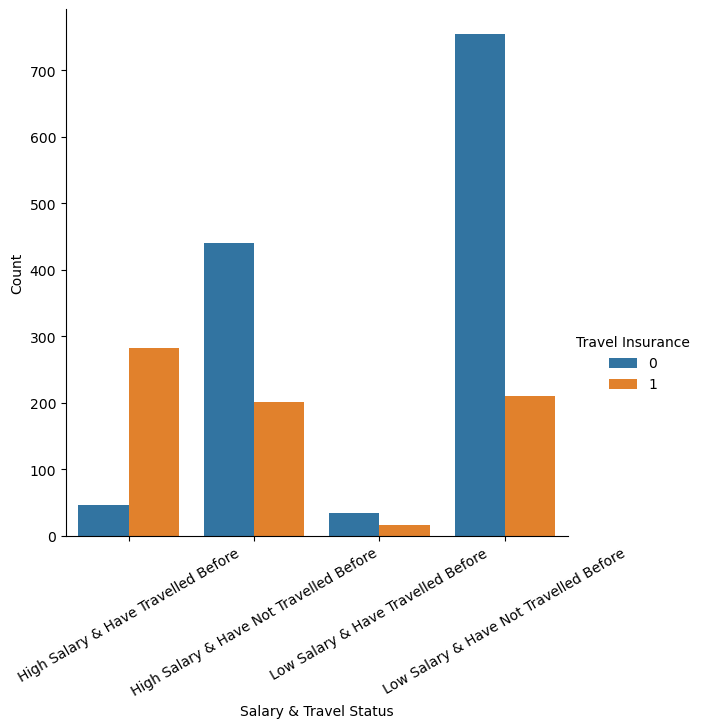

In [67]:
temp = pd.concat([travel_abroad_agg_renamed, pd.DataFrame({"Travel Insurance": [0,1]})], axis=1)
temp1 = temp.melt(id_vars=["Travel Insurance"], var_name = "Salary & Travel Status", value_name = "Count")
g = sns.catplot(
    data=temp1, kind="bar",
    x="Salary & Travel Status", y="Count", hue="Travel Insurance",
    errorbar="sd", height=6
)
plt.xticks(rotation=30)
plt.show()

Looking at this graph, we can see that the only case in which there are more people buying travel insurance is for a group with high salary and previous experience in traveling. We can conclude that this group can not only afford insurance services, but also know what do expect from trips. On the other hand, people with high salary, but with no travelling experience shows less people buying the insurance than those who are not. We figure that previous experience plays a big role because they do not know what to expect, although they can afford travel insurances. We notice that there are much less people in a group with low salary and with previous travelling experience. This is evident, for they are most likely to financially focus on other things, rather than going on trips. On the contrary, we notice there are lots of people in the group with low salary and with no travelling experience in the past.

In [21]:
print("The table above shows the number of people, separated by whether they have travelled before or not. It is grouped by status of travel insurance.")
print(f"Proportions: \n High Salary & Have Travelled Before: {282/(47+282)} \n High Salary & Have Not Travelled Before: {202/(202+441)}")
print(f"Proportions: \n Low Salary & Have Travelled Before: {16/(35+16)} \n Low Salary & Have Not Travelled Before: {210/(210+754)}")

The table above shows the number of people, separated by whether they have travelled before or not. It is grouped by status of travel insurance.
Proportions: 
 High Salary & Have Travelled Before: 0.8571428571428571 
 High Salary & Have Not Travelled Before: 0.3141524105754277
Proportions: 
 Low Salary & Have Travelled Before: 0.3137254901960784 
 Low Salary & Have Not Travelled Before: 0.21784232365145229


This shows that approximately 86% of people with high salary and who have gone travelling abroad before, are getting travel insurances. On the other hand, approximately 31% of those who have high salary and have not gone travelling abroad before, are also getting travel insurances. We also notice that for both of the salary groups, people who have travelled before, tends to get travel insurance. High demand on travel insurnace could be due to various reasons, such as an increase in travel activities, awareness about the importance of travel insurance, or specific events (like natural disasters or health crises) that prompt people to secure insurance coverage for their trips. High demand could also indicate that travellers are becoming more risk-conscious and are seeking protection against unforeseen events during their travels. Let us further examine the relationships with `ChronicDiseases`. 

Among people who have travelled before, we are interested in people who have chronic diseases.

In [22]:
travelled_disease = data.loc[data["EverTravelledAbroad"] == 1, ["EverTravelledAbroad", "TravelInsurance"]].groupby(["TravelInsurance"]).count()
not_travelled_disease = data.loc[data["EverTravelledAbroad"] == 0, ["EverTravelledAbroad", "TravelInsurance"]].groupby(["TravelInsurance"]).count()
disease = pd.concat([travelled_disease, not_travelled_disease], axis=1)

disease.set_axis(["Has Chronic Disease", "No Chronic Disease"], axis=1)

,Has Chronic Disease,No Chronic Disease
TravelInsurance,,
0,82,1195
1,298,412


In [24]:
disease = pd.concat([disease, pd.DataFrame(data={"Travel Insurance": [0,1]})], axis=1)
# disease.melt(id_vars = "Travel Insurance", var_name = "Disease Status", value_name = "count")
disease

,EverTravelledAbroad,EverTravelledAbroad,Travel Insurance,Travel Insurance
0,82,1195,0,0
1,298,412,1,1
